결정트리
==
데이터
--
- 붓꽃(iris) 분류 데이터


In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, :2] 
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

결정 트리 그리기 (옵션)
--

Graphbiz 설치
--

- graphviz.org 사이트에서 다운로드 후 설치
- 윈도우 버전:
- https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [4]:
!pip install graphviz

In [5]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    clf,
    out_file = "./iris.dot",
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names,
    filled = True
    )

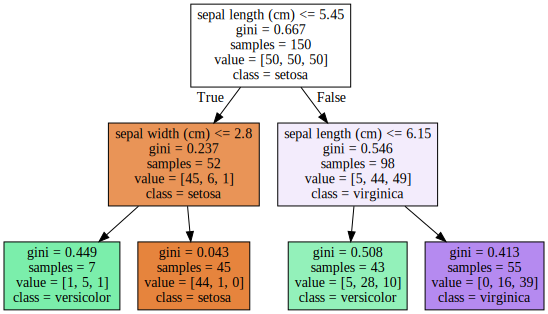

In [6]:
with open("./iris.dot") as f:
    dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

결정 경계선 그리기
--

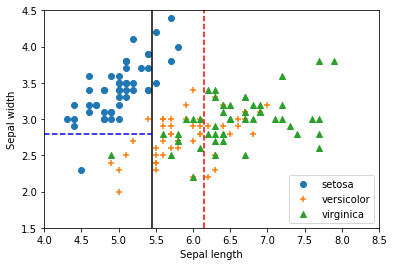

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '-k') # 검정색 실선

xx = np.linspace(4, 5.45, 3)
yy = np.linspace(2.8, 2.8, 3)
plt.plot(xx, yy, '--b') # 파란색 점선

xx = np.linspace(6.15, 6.15, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '--r') # 붉은색 점선


In [8]:
print(clf.predict([[5.5, 4]]))

[1]


In [9]:
print(clf.predict_proba([[5.5, 4]]))

[[0.11627907 0.65116279 0.23255814]]


## 트리 내부 변수
### 유방암 분류

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
cancer = load_breast_cancer() 

In [16]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [17]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
np.random.seed(9)
# X_train, X_test, y_train, y_test = train_test_split(
#    cancer.data, cancer.target, stratify=cancer.target) 
# stratify: If not None, data is split in a stratified fashion, using this as the class labels.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target) 

In [26]:
X_train, y_train

(array([[1.359e+01, 2.184e+01, 8.716e+01, ..., 6.189e-02, 2.446e-01,
         7.024e-02],
        [8.888e+00, 1.464e+01, 5.879e+01, ..., 4.786e-02, 2.254e-01,
         1.084e-01],
        [1.290e+01, 1.592e+01, 8.374e+01, ..., 1.012e-01, 3.549e-01,
         8.118e-02],
        ...,
        [1.382e+01, 2.449e+01, 9.233e+01, ..., 1.521e-01, 3.651e-01,
         1.183e-01],
        [1.147e+01, 1.603e+01, 7.302e+01, ..., 6.548e-02, 2.851e-01,
         8.763e-02],
        [1.205e+01, 2.272e+01, 7.875e+01, ..., 1.092e-01, 2.191e-01,
         9.349e-02]]),
 array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
 

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9370629370629371


In [29]:
# feature importance: is calculated as the decrease in node impurity 
# weighted by the probability of reaching that node. The node probability 
# can be calculated by the number of samples that reach the node, 
# divided by the total number of samples. The higher the value the more 
# important the feature.

In [30]:
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))

[('mean radius', 0.0074),
 ('mean texture', 0.043),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.0033),
 ('smoothness error', 0.0),
 ('compactness error', 0.0188),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0093),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.7116),
 ('worst texture', 0.0591),
 ('worst perimeter', 0.0),
 ('worst area', 0.0),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.0211),
 ('worst concavity', 0.0106),
 ('worst concave points', 0.1157),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

In [31]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })

In [32]:
df

,feature,importance
0,mean radius,0.007389
1,mean texture,0.043044
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.000000
8,mean symmetry,0.000000
9,mean fractal dimension,0.000000


In [33]:
df=df.sort_values('importance', ascending=False) 
print(df.head(20))

                   feature  importance
20            worst radius    0.711625
27    worst concave points    0.115708
21           worst texture    0.059071
1             mean texture    0.043044
25       worst compactness    0.021073
15       compactness error    0.018815
26         worst concavity    0.010635
18          symmetry error    0.009318
0              mean radius    0.007389
13              area error    0.003323
9   mean fractal dimension    0.000000
6           mean concavity    0.000000
28          worst symmetry    0.000000
2           mean perimeter    0.000000
3                mean area    0.000000
4          mean smoothness    0.000000
24        worst smoothness    0.000000
23              worst area    0.000000
22         worst perimeter    0.000000
5         mean compactness    0.000000


In [36]:
df.shape

(30, 2)

In [37]:
len(df.feature)

30

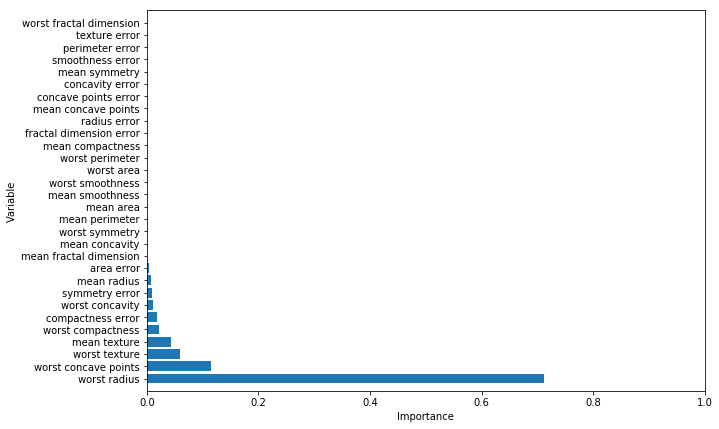

In [44]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7)) 
plt.barh(x, y) 
plt.yticks(ypos, x) 
plt.xlabel('Importance') 
plt.ylabel('Variable') 
plt.xlim(0, 1) 
plt.ylim(-1, len(x)) 
plt.show()

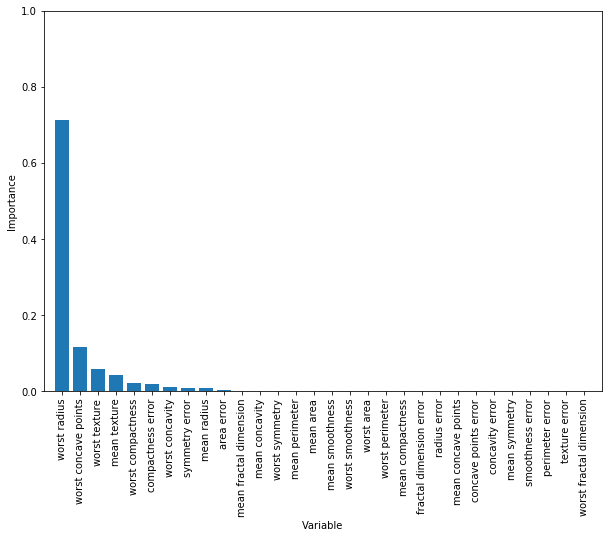

In [42]:
x = df.feature
y = df.importance

plt.figure(figsize=(10,7)) 
plt.bar(x, y) 
plt.ylabel('Importance') 
plt.xlabel('Variable') 
plt.xticks(rotation=90)
plt.ylim(0, 1) 
plt.xlim(-1, len(x)) 
plt.show()